In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("input_test_YW07KeM.csv")
df.head(5)

,ID,neuron_id,timestamp_0,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6,timestamp_7,...,timestamp_40,timestamp_41,timestamp_42,timestamp_43,timestamp_44,timestamp_45,timestamp_46,timestamp_47,timestamp_48,timestamp_49
0,16635,10596,0.011162,0.221068,0.430589,0.502385,0.678627,1.022000,1.200516,1.496142,...,9.694898,9.779988,15.699566,18.796651,19.081662,20.872090,22.135599,25.923326,34.213513,34.252010
1,16636,9836,0.461402,1.118278,1.708740,1.718111,1.723203,1.992070,2.203136,2.364779,...,12.668427,12.679908,12.686186,13.058848,14.343126,14.737324,14.794357,16.582621,16.962624,17.078453
2,16637,10392,0.483416,0.574965,2.160823,2.271720,2.342907,2.885647,2.985719,3.059417,...,18.373623,18.415545,18.553847,19.440229,20.054671,20.574787,20.729883,21.539690,22.917697,24.126154
3,16638,10045,0.008057,0.864662,1.610694,1.935644,1.947676,3.027078,3.237863,3.275289,...,17.747281,18.363834,18.413200,18.528544,18.539123,18.995198,19.181297,19.436815,19.787004,19.929389
4,16639,8320,5.815709,7.666392,8.009023,8.027219,10.201623,10.249832,10.858486,10.865641,...,28.048953,28.073936,28.080053,28.089389,29.077675,29.255499,29.438389,29.453067,29.516642,29.549979


In [3]:
dfint=pd.read_csv("training_un7FCmp.csv")
y=pd.read_csv("target_ATndViR.csv")

In [4]:
# stockons ces données pour la suite
X0=dfint
#différencions les timestamp et nommons X le résultat
X=dfint.diff(axis=1)
X['ID']=dfint['ID']
X=X.drop('neuron_id',axis=1)
X=X.drop('timestamp_0',axis=1)

In [5]:
# stockons les également
X1=X

In [6]:
#de même pour les données de validation
X_v=df.diff(axis=1)
X_v['ID']=df['ID']
X_v=X_v.drop('neuron_id',axis=1)
X_v=X_v.drop('timestamp_0',axis=1)
#X_v=X_v.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
X_v.head(5)

,ID,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6,timestamp_7,timestamp_8,timestamp_9,...,timestamp_40,timestamp_41,timestamp_42,timestamp_43,timestamp_44,timestamp_45,timestamp_46,timestamp_47,timestamp_48,timestamp_49
0,16635,0.209906,0.209521,0.071795,0.176242,0.343373,0.178515,0.295627,2.162661,0.297823,...,1.402280,0.085091,5.919577,3.097085,0.285011,1.790428,1.263509,3.787726,8.290187,0.038497
1,16636,0.656876,0.590462,0.009371,0.005092,0.268867,0.211066,0.161642,0.510456,0.154107,...,0.080638,0.011481,0.006279,0.372661,1.284278,0.394198,0.057033,1.788264,0.380003,0.115829
2,16637,0.091549,1.585858,0.110896,0.071187,0.542740,0.100072,0.073698,0.415311,0.030382,...,0.051218,0.041921,0.138303,0.886382,0.614442,0.520117,0.155096,0.809807,1.378007,1.208458
3,16638,0.856605,0.746032,0.324951,0.012032,1.079402,0.210785,0.037427,0.025324,0.005467,...,0.346384,0.616553,0.049366,0.115343,0.010579,0.456075,0.186098,0.255518,0.350189,0.142385
4,16639,1.850684,0.342631,0.018195,2.174404,0.048210,0.608654,0.007155,0.854837,0.375030,...,0.112346,0.024983,0.006117,0.009336,0.988286,0.177824,0.182890,0.014678,0.063575,0.033337


In [7]:
#et les cibles
y= y.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
y.describe()

,TARGET
count,16635.000000
mean,0.183829
std,0.387357
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16635 entries, 0 to 16634
Data columns (total 1 columns):
TARGET    16635 non-null int64
dtypes: int64(1)
memory usage: 259.9 KB


In [9]:
y.TARGET.value_counts()

0    13577
1     3058
Name: TARGET, dtype: int64

In [10]:
X_v.head()

,ID,timestamp_1,timestamp_2,timestamp_3,timestamp_4,timestamp_5,timestamp_6,timestamp_7,timestamp_8,timestamp_9,...,timestamp_40,timestamp_41,timestamp_42,timestamp_43,timestamp_44,timestamp_45,timestamp_46,timestamp_47,timestamp_48,timestamp_49
0,16635,0.209906,0.209521,0.071795,0.176242,0.343373,0.178515,0.295627,2.162661,0.297823,...,1.402280,0.085091,5.919577,3.097085,0.285011,1.790428,1.263509,3.787726,8.290187,0.038497
1,16636,0.656876,0.590462,0.009371,0.005092,0.268867,0.211066,0.161642,0.510456,0.154107,...,0.080638,0.011481,0.006279,0.372661,1.284278,0.394198,0.057033,1.788264,0.380003,0.115829
2,16637,0.091549,1.585858,0.110896,0.071187,0.542740,0.100072,0.073698,0.415311,0.030382,...,0.051218,0.041921,0.138303,0.886382,0.614442,0.520117,0.155096,0.809807,1.378007,1.208458
3,16638,0.856605,0.746032,0.324951,0.012032,1.079402,0.210785,0.037427,0.025324,0.005467,...,0.346384,0.616553,0.049366,0.115343,0.010579,0.456075,0.186098,0.255518,0.350189,0.142385
4,16639,1.850684,0.342631,0.018195,2.174404,0.048210,0.608654,0.007155,0.854837,0.375030,...,0.112346,0.024983,0.006117,0.009336,0.988286,0.177824,0.182890,0.014678,0.063575,0.033337


### Ajoutons un peu de Feature Engineering basique

In [11]:
X_c=X.drop('ID',axis=1)
X['min']=X_c.min(axis=1)
X['max']=X_c.max(axis=1)
X['sum']=X_c.sum(axis=1)
for i in range(1,20):
    X['Q'+str(i)]=X_c.quantile(0.05*i,axis=1)
#dbi['kurt']=X_c.apply(stats.kurtosis,axis=1)

In [12]:
X_cv=X_v.drop('ID',axis=1)
X_v['min']=X_cv.min(axis=1)
X_v['max']=X_cv.max(axis=1)
X_v['sum']=X_cv.sum(axis=1)
for i in range(1,20):
    X_v['Q'+str(i)]=X_cv.quantile(0.05*i,axis=1)

In [13]:
Xi=X['ID']
Xvi=X_v['ID']

In [14]:
## ne gardons que les nouveaux features
X=X.loc[:,'min':'Q19']
X_v=X_v.loc[:,'min':'Q19']
X['neuron_id']=dfint['neuron_id']
X_v['neuron_id']=df['neuron_id']
X['ID']=dfint['ID']
X_v['ID']=df['ID']

In [15]:
X['std']=X_c.std(axis=1)
X['skew']=X_c.skew(axis=1)
X['kurt']=X_c.kurtosis(axis=1)
X_v['std']=X_cv.std(axis=1)
X_v['skew']=X_cv.skew(axis=1)
X_v['kurt']=X_cv.kurtosis(axis=1)

In [16]:
X=X[['ID','min','max','sum','Q1','Q19','Q5','Q10','Q14','Q17','neuron_id','std','skew','kurt']]

In [17]:
X_v=X_v[['ID','min','max','sum','Q1','Q19','Q5','Q10','Q14','Q17','neuron_id','std','skew','kurt']]

In [18]:
#évitons de dubliquer les index
#X=X.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
X.head(5)

,ID,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,neuron_id,std,skew,kurt
0,0,0.004133,2.838052,16.890141,0.005271,1.875586,0.013713,0.064258,0.223973,0.465674,53,0.660936,2.705496,7.000256
1,1,0.008825,6.492402,20.070440,0.012309,1.185932,0.053775,0.188263,0.319462,0.494535,7229,0.952709,5.710949,36.158835
2,2,0.014021,3.185310,32.760354,0.026328,1.765741,0.162346,0.342279,1.001320,1.325387,7770,0.673696,1.410433,2.497110
3,3,0.004493,1.077179,17.123573,0.008680,0.930802,0.093343,0.309909,0.477036,0.722543,7002,0.301286,0.745403,-0.356057
4,4,0.012688,2.653620,19.089308,0.016814,1.777028,0.075561,0.185276,0.295910,0.789147,7678,0.576474,2.688026,7.215277


In [19]:
#X_v=X_v.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
X_v.head(5)

,ID,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,neuron_id,std,skew,kurt
0,16635,0.002036,8.290187,34.240848,0.011485,3.511470,0.037398,0.101349,0.271041,1.194343,10596,1.567783,3.492442,13.214765
1,16636,0.004059,1.788264,16.617051,0.004660,1.152712,0.048387,0.177632,0.406586,0.734361,9836,0.404913,1.715368,3.046876
2,16637,0.023854,1.856078,23.642738,0.040912,1.344582,0.084176,0.199624,0.744428,1.092620,10392,0.497872,0.974310,-0.105463
3,16638,0.005467,2.160881,19.921332,0.008381,1.248020,0.097617,0.325497,0.462863,0.726132,10045,0.436612,2.019138,5.042425
4,16639,0.004355,4.056448,23.734271,0.005562,2.458294,0.013474,0.056510,0.278735,1.315654,8320,0.880332,2.383507,5.744958


### pour essayer de reconnaitre des types différents de neurones, ajoutons comme feature pour chaque neurone la moyenne des features des neurones identiques et leur nombre

In [20]:
X_nNid=X.neuron_id.value_counts()
Xv_nNid=X_v.neuron_id.value_counts()

In [21]:
X_N=X.groupby(by="neuron_id").mean()
Xv_N=X_v.groupby(by="neuron_id").mean()

In [22]:
X_N['n_Nid']=X_nNid
Xv_N['n_Nid']=Xv_nNid

In [23]:
X_N=X_N.drop('ID',axis=1)
Xv_N=Xv_N.drop('ID',axis=1)
X_N.tail()

,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,std,skew,kurt,n_Nid
neuron_id,,,,,,,,,,,,,
7862,0.005812,4.170099,32.320196,0.011192,2.284290,0.063768,0.341622,0.753150,1.349849,0.877710,2.166091,5.972299,80
7908,0.007434,3.495597,26.773750,0.014741,1.982056,0.056954,0.243354,0.594857,1.124771,0.753427,2.230275,6.141883,667
7954,0.013166,4.403039,31.706503,0.023675,2.354124,0.073078,0.283735,0.682246,1.303964,0.918313,2.408682,7.374123,312
8000,0.005533,3.869315,28.526136,0.010747,2.145962,0.061864,0.250579,0.619938,1.185983,0.822183,2.371840,6.983059,502
8046,0.009245,4.221909,22.057530,0.018776,1.791085,0.058106,0.137297,0.345454,0.819951,0.813560,3.204622,12.286895,58


In [24]:
X_N=X_N.rename(columns = {'std':'sstd', 'skew':'sskew','kurt':'skurt','min':'smin', 'max':'smax','sum':'ssum','Q1':'sQ1','Q19':'sQ19','Q5':'sQ5','Q10':'sQ10','Q14':'sQ14','Q17':'sQ17'})
Xv_N=Xv_N.rename(columns = {'std':'sstd', 'skew':'sskew','kurt':'skurt','min':'smin', 'max':'smax','sum':'ssum','Q1':'sQ1','Q19':'sQ19','Q5':'sQ5','Q10':'sQ10','Q14':'sQ14','Q17':'sQ17'})

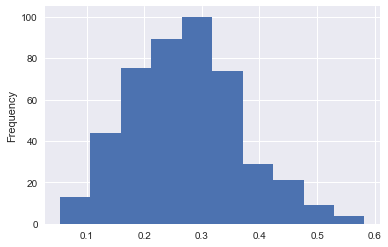

In [25]:
X_N['sQ10'].plot(kind='hist')

In [26]:
X_N=X_N.reset_index()
Xv_N=Xv_N.reset_index()

In [27]:
X_N.tail()

,neuron_id,smin,smax,ssum,sQ1,sQ19,sQ5,sQ10,sQ14,sQ17,sstd,sskew,skurt,n_Nid
453,7862,0.005812,4.170099,32.320196,0.011192,2.284290,0.063768,0.341622,0.753150,1.349849,0.877710,2.166091,5.972299,80
454,7908,0.007434,3.495597,26.773750,0.014741,1.982056,0.056954,0.243354,0.594857,1.124771,0.753427,2.230275,6.141883,667
455,7954,0.013166,4.403039,31.706503,0.023675,2.354124,0.073078,0.283735,0.682246,1.303964,0.918313,2.408682,7.374123,312
456,8000,0.005533,3.869315,28.526136,0.010747,2.145962,0.061864,0.250579,0.619938,1.185983,0.822183,2.371840,6.983059,502
457,8046,0.009245,4.221909,22.057530,0.018776,1.791085,0.058106,0.137297,0.345454,0.819951,0.813560,3.204622,12.286895,58


In [28]:
X=pd.merge(X,X_N,how='outer',on='neuron_id')
X_v=pd.merge(X_v,Xv_N,how='outer',on='neuron_id')

In [29]:
X_v.tail()

,ID,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,...,sQ1,sQ19,sQ5,sQ10,sQ14,sQ17,sstd,sskew,skurt,n_Nid
11964,27942,0.026427,3.701644,29.599499,0.045083,2.961347,0.101035,0.212350,0.346070,1.322080,...,0.045002,2.777088,0.090029,0.228926,0.542605,1.489510,1.134031,3.023222,11.580897,2
11965,25286,0.007296,2.459670,26.406206,0.016311,1.988665,0.060598,0.292479,0.690669,1.139228,...,0.014968,2.670857,0.051386,0.258704,0.654906,1.059568,0.891005,2.151017,4.636246,2
11966,27057,0.011522,5.288187,32.866902,0.013625,3.353049,0.042174,0.224929,0.619144,0.979908,...,0.014968,2.670857,0.051386,0.258704,0.654906,1.059568,0.891005,2.151017,4.636246,2
11967,25380,0.015146,4.166276,37.722317,0.044811,2.512414,0.158199,0.462811,0.771719,1.625802,...,0.044811,2.512414,0.158199,0.462811,0.771719,1.625802,0.909565,1.942911,3.860341,1
11968,25476,0.012743,14.712678,41.001468,0.031240,3.771723,0.092582,0.153970,0.269383,1.075314,...,0.031240,3.771723,0.092582,0.153970,0.269383,1.075314,2.308395,5.035940,28.386275,1


In [30]:
X_v=X_v.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)
X=X.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)

In [31]:
X.tail()

,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,neuron_id,...,sQ1,sQ19,sQ5,sQ10,sQ14,sQ17,sstd,sskew,skurt,n_Nid
ID,,,,,,,,,,,,,,,,,,,,,
15522,0.004105,4.253219,27.537104,0.013984,2.875511,0.031012,0.075018,0.516884,1.088634,6635,...,0.013136,2.369064,0.028568,0.102446,0.525913,0.996331,1.101558,3.646860,16.912747,2
15826,0.009274,8.098914,27.651870,0.012288,1.862618,0.026124,0.129874,0.534941,0.904028,6635,...,0.013136,2.369064,0.028568,0.102446,0.525913,0.996331,1.101558,3.646860,16.912747,2
15732,0.013887,3.073640,17.076294,0.014953,0.981476,0.029192,0.160238,0.458528,0.733967,7175,...,0.014953,0.981476,0.029192,0.160238,0.458528,0.733967,0.501989,3.585255,17.694648,1
16212,0.004953,3.285168,39.871736,0.010134,3.003565,0.038211,0.348183,1.027361,1.891302,1844,...,0.010134,3.003565,0.038211,0.348183,1.027361,1.891302,0.954558,1.176995,0.400772,1
16378,0.029655,7.486987,41.630914,0.037147,3.108547,0.167769,0.372796,0.842551,1.291225,6470,...,0.037147,3.108547,0.167769,0.372796,0.842551,1.291225,1.300369,3.368105,14.067477,1


In [32]:
X=X.sort_index()
X_v=X_v.sort_index()

In [33]:
X_v.tail()

,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,neuron_id,...,sQ1,sQ19,sQ5,sQ10,sQ14,sQ17,sstd,sskew,skurt,n_Nid
ID,,,,,,,,,,,,,,,,,,,,,
28599,0.005004,2.657370,20.560134,0.011102,2.115094,0.023233,0.099266,0.408774,0.881174,9456,...,0.014136,1.816654,0.065362,0.286239,0.617498,1.081445,0.675255,2.038179,5.154485,401
28600,0.014982,5.432680,23.526364,0.024350,1.812050,0.056485,0.106711,0.324522,0.617622,10064,...,0.025778,2.161744,0.057474,0.144425,0.386520,0.926086,0.972051,3.411902,14.016257,29
28601,0.004168,2.740944,24.708195,0.015091,1.413553,0.114254,0.248296,0.625920,1.018667,10045,...,0.010721,1.565300,0.060215,0.212774,0.471272,0.888104,0.587904,2.230745,6.179899,408
28602,0.007228,4.517674,40.986441,0.010994,2.997530,0.077272,0.506136,0.763830,1.763133,9570,...,0.022007,2.171354,0.093338,0.324087,0.676868,1.206765,0.813868,2.318712,6.870098,257
28603,0.001201,2.266807,19.366062,0.004275,1.487219,0.022676,0.164298,0.509957,0.733062,9836,...,0.004891,1.183957,0.042074,0.190916,0.413882,0.706956,0.438711,1.961524,4.818670,311


In [34]:
#Essayons des ratios
X['rmin']=X['min']/X['smin']
X['rmax']=X['max']/X['smax']
X['rsum']=X['sum']/X['ssum']
X['rQ1']=X['Q1']/X['sQ1']
X['rQ19']=X['Q19']/X['sQ19']
X['rQ5']=X['Q5']/X['sQ5']
X['rQ10']=X['Q10']/X['sQ10']
X['rQ14']=X['Q14']/X['sQ14']
X['rQ17']=X['Q17']/X['sQ17']
X['rstd']=X['std']/X['sstd']
X['rskew']=X['skew']/X['sskew']
X['rkurt']=X['kurt']/X['skurt']

In [35]:
X_v['rmin']=X_v['min']/X_v['smin']
X_v['rmax']=X_v['max']/X_v['smax']
X_v['rsum']=X_v['sum']/X_v['ssum']
X_v['rQ1']=X_v['Q1']/X_v['sQ1']
X_v['rQ19']=X_v['Q19']/X_v['sQ19']
X_v['rQ5']=X_v['Q5']/X_v['sQ5']
X_v['rQ10']=X_v['Q10']/X_v['sQ10']
X_v['rQ14']=X_v['Q14']/X_v['sQ14']
X_v['rQ17']=X_v['Q17']/X_v['sQ17']
X_v['rstd']=X_v['std']/X_v['sstd']
X_v['rskew']=X_v['skew']/X_v['sskew']
X_v['rkurt']=X_v['kurt']/X_v['skurt']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16635 entries, 0 to 16634
Data columns (total 38 columns):
min          16635 non-null float64
max          16635 non-null float64
sum          16635 non-null float64
Q1           16635 non-null float64
Q19          16635 non-null float64
Q5           16635 non-null float64
Q10          16635 non-null float64
Q14          16635 non-null float64
Q17          16635 non-null float64
neuron_id    16635 non-null int64
std          16635 non-null float64
skew         16635 non-null float64
kurt         16635 non-null float64
smin         16635 non-null float64
smax         16635 non-null float64
ssum         16635 non-null float64
sQ1          16635 non-null float64
sQ19         16635 non-null float64
sQ5          16635 non-null float64
sQ10         16635 non-null float64
sQ14         16635 non-null float64
sQ17         16635 non-null float64
sstd         16635 non-null float64
sskew        16635 non-null float64
skurt        16635 non-null f

## Passons à la modélisation

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

#### Ici pour assurer l'indépendance des train et test, nous devons séparer les neurones entre train et test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
nX=X.neuron_id.unique()

In [40]:
n_train, n_test =train_test_split(nX,random_state=42)

In [41]:
print(len(n_train))
print(len(n_test))

343
115


In [42]:
l_train=n_train.tolist()
l_test=n_test.tolist()

##### construisons nos X_train y_train et X_test y_test en fonction de ces neurones

In [43]:
Z=X
Z['TARGET']=y.TARGET

In [44]:
X_train=Z[Z.neuron_id.isin(l_train)]
X_test=Z[Z.neuron_id.isin(l_test)]

In [45]:
X_train=X_train.drop('neuron_id',axis=1)
X_test=X_test.drop('neuron_id',axis=1)
y_train=X_train.TARGET
y_test=X_test.TARGET
X_train=X_train.drop('TARGET',axis=1)
X_test=X_test.drop('TARGET',axis=1)

In [46]:
X_train.head()

,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,std,...,rsum,rQ1,rQ19,rQ5,rQ10,rQ14,rQ17,rstd,rskew,rkurt
ID,,,,,,,,,,,,,,,,,,,,,
1,0.008825,6.492402,20.070440,0.012309,1.185932,0.053775,0.188263,0.319462,0.494535,0.952709,...,0.867271,0.892002,0.666362,0.919070,1.003999,0.694198,0.511666,1.341678,2.191855,3.960278
2,0.014021,3.185310,32.760354,0.026328,1.765741,0.162346,0.342279,1.001320,1.325387,0.673696,...,1.354845,0.697874,1.141249,1.328097,1.149473,1.779278,1.413753,1.213620,0.694151,0.478451
3,0.004493,1.077179,17.123573,0.008680,0.930802,0.093343,0.309909,0.477036,0.722543,0.301286,...,0.932258,0.586578,0.755135,1.364309,1.477599,1.125183,0.977692,0.657455,0.352609,-0.062221
4,0.012688,2.653620,19.089308,0.016814,1.777028,0.075561,0.185276,0.295910,0.789147,0.576474,...,0.804185,1.321384,1.059359,1.091394,0.737187,0.547287,0.817237,0.916774,1.208050,1.137492
5,0.013388,2.743436,27.453739,0.033790,1.810260,0.094920,0.454257,0.697666,0.966090,0.585895,...,1.135384,0.895671,1.170022,0.776504,1.525529,1.239705,1.030501,1.055452,0.926530,0.806326


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [48]:
from sklearn.tree import DecisionTreeClassifier

### let's try random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {'max_depth': range(1,8), 'max_features': [1,2,3,5,10,None]}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, scoring= 'accuracy', cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))

D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Best parameters: {'max_depth': 7, 'max_features': 10}
Best cross-validation score: 0.811
Test set score: 0.790


In [52]:
tree = RandomForestClassifier(max_depth=8,max_features=10,class_weight='balanced',random_state=42,n_estimators=140)
tree.fit(X_train,y_train)
Acc_appr=tree.score(X_train,y_train)
Acc_test=tree.score(X_test,y_test)
y_pred=tree.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print('for depth',8)
print("accuracy on training set is {:.3f}".format(Acc_appr))
print("accuracy on test set is {:.3f}".format(Acc_test))
print("roc_auc_score on test set is {:.3f}".format(roc_test))
print("Cohen-Kappa",cohen_kappa_score(y_test, y_pred))

for depth 8
accuracy on training set is 0.889
accuracy on test set is 0.835
roc_auc_score on test set is 0.730
Cohen-Kappa 0.43369238043737446


In [53]:
y_test.mean()

0.1643290768264601

In [54]:
y_pred.mean()

0.18965878166213104

# and lightGBM

In [55]:
import lightgbm as lgb
from sklearn.model_selection import KFold

In [57]:
gbl2 = lgb.LGBMClassifier(class_weight='balanced', random_state=42,max_depth=8)
np.set_printoptions(precision=3)
gbl2.fit(X_train,y_train)
y_pred=gbl2.predict(X_test)
roc_test=roc_auc_score(y_test, y_pred)
print("accuracy on training set is {:.3f}".format(gbl2.score(X_train,y_train)))
print("accuracy on test set is {:.3f}".format(gbl2.score(X_test,y_test)))
print("roc_auc_score on test set is {:.3f}".format(roc_test))
print("Cohen-Kappa",cohen_kappa_score(y_test, y_pred))

accuracy on training set is 0.911
accuracy on test set is 0.824
roc_auc_score on test set is 0.713
Cohen-Kappa 0.40011716558079957


In [61]:
Xt2=X_train.drop(['Q19','sQ19','rQ19','rsum'],axis=1)
Xs2=X_test.drop(['Q19','sQ19','rQ19','rsum'],axis=1)
to_test=Xt2.columns
for col in to_test:
    Xt1=Xt2.drop(col,axis=1)
    Xs1=Xs2.drop(col,axis=1)
    gbl1 = lgb.LGBMClassifier(class_weight='balanced', random_state=42, num_leaves=16, lambda_l2=0.01)
    np.set_printoptions(precision=3)
    gbl1.fit(Xt1,y_train)
    y_pred=gbl1.predict(Xs1)
    roc_test=roc_auc_score(y_test, y_pred)
    print(col)
    print("accuracy on training set is {:.3f}".format(gbl1.score(Xt1,y_train)))
    print("accuracy on test set is {:.3f}".format(gbl1.score(Xs1,y_test)))
    print("roc_auc_score on test set is {:.3f}".format(roc_test))
    print("Cohen-Kappa",cohen_kappa_score(y_test, y_pred))
    print()

min
accuracy on training set is 0.870
accuracy on test set is 0.818
roc_auc_score on test set is 0.737
Cohen-Kappa 0.41674287773655583

max
accuracy on training set is 0.870
accuracy on test set is 0.826
roc_auc_score on test set is 0.740
Cohen-Kappa 0.4301205238563681

sum
accuracy on training set is 0.869
accuracy on test set is 0.817
roc_auc_score on test set is 0.739
Cohen-Kappa 0.41703551349998913

Q1
accuracy on training set is 0.870
accuracy on test set is 0.815
roc_auc_score on test set is 0.735
Cohen-Kappa 0.410255716347681

Q5
accuracy on training set is 0.871
accuracy on test set is 0.818
roc_auc_score on test set is 0.730
Cohen-Kappa 0.4099567063919902

Q10
accuracy on training set is 0.869
accuracy on test set is 0.816
roc_auc_score on test set is 0.730
Cohen-Kappa 0.4068236883284495

Q14
accuracy on training set is 0.869
accuracy on test set is 0.812
roc_auc_score on test set is 0.726
Cohen-Kappa 0.39780693374513243

Q17
accuracy on training set is 0.869
accuracy on test 

In [62]:
#Xt1=X_train.drop(['sskew','skew','Q1'],axis=1)
#Xs1=X_test.drop(['sskew','skew','Q1'],axis=1)
Xt1=X_train.drop(['Q19','sQ19','rQ19','rsum'],axis=1)
Xs1=X_test.drop(['Q19','sQ19','rQ19','rsum'],axis=1)
gbl1 = lgb.LGBMClassifier(class_weight='balanced', random_state=42, num_leaves=16, lambda_l2=0.01)
np.set_printoptions(precision=3)
gbl1.fit(Xt1,y_train)
y_pred=gbl1.predict(Xs1)
roc_test=roc_auc_score(y_test, y_pred)
print("accuracy on training set is {:.3f}".format(gbl1.score(Xt1,y_train))) 
print("accuracy on test set is {:.3f}".format(gbl1.score(Xs1,y_test)))
print("roc_auc_score on test set is {:.3f}".format(roc_test))
print("Cohen-Kappa",cohen_kappa_score(y_test, y_pred))
print()

accuracy on training set is 0.870
accuracy on test set is 0.830
roc_auc_score on test set is 0.741
Cohen-Kappa 0.4375119996890957



In [63]:
X.tail()

,min,max,sum,Q1,Q19,Q5,Q10,Q14,Q17,neuron_id,...,rQ1,rQ19,rQ5,rQ10,rQ14,rQ17,rstd,rskew,rkurt,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
16630,0.028555,4.242780,34.796577,0.038932,2.306630,0.115593,0.334735,0.940754,1.316044,5691,...,1.074983,1.141054,1.037201,1.175192,1.499639,1.221306,1.130786,0.875742,0.673480,0
16631,0.008560,2.076764,21.155406,0.020035,1.522769,0.037442,0.295225,0.440213,0.931445,2341,...,1.387131,0.997003,0.929701,1.745344,1.021469,1.108969,0.853799,0.699902,0.305101,0
16632,0.008829,2.399501,14.978912,0.020136,1.341983,0.053426,0.120216,0.223145,0.497330,8046,...,1.072462,0.749257,0.919456,0.875588,0.645947,0.606537,0.623902,0.896911,0.684955,1
16633,0.010333,5.102200,24.515422,0.013332,2.741433,0.034254,0.069025,0.335118,0.576550,6855,...,0.823357,1.058106,0.927055,0.477367,0.693808,0.526180,0.885625,1.039525,0.851702,0
16634,0.017809,4.227622,28.212819,0.033641,2.489949,0.089119,0.219918,0.519206,1.127686,6921,...,1.298063,1.090950,1.040449,0.859317,0.905597,1.000038,0.887165,0.896281,0.667276,0


In [64]:
X=X.drop('TARGET',axis=1)
X=X.drop('neuron_id',axis=1)

In [65]:
X_v=X_v.drop('neuron_id', axis=1)

# fittons sur tout l'apprentissage

In [66]:
X=X.drop(['Q19','sQ19','rQ19','rsum'],axis=1)
X_v=X_v.drop(['Q19','sQ19','rQ19','rsum'],axis=1)
gbl2 = lgb.LGBMClassifier(class_weight='balanced', random_state=42, num_leaves=16, lambda_l2=0.01)
np.set_printoptions(precision=3)
gbl2.fit(X,y.TARGET)
y_pred=gbl2.predict(X)
roc_fit=roc_auc_score(y.TARGET, y_pred)
print("accuracy on training set is {:.3f}".format(gbl2.score(X,y.TARGET)))
print("roc_auc_score on train set is {:.3f}".format(roc_fit))
print("Cohen-Kappa fit",cohen_kappa_score(y.TARGET, y_pred))

accuracy on training set is 0.861
roc_auc_score on train set is 0.869
Cohen-Kappa fit 0.6150852441630645


In [67]:
X.head()

,min,max,sum,Q1,Q5,Q10,Q14,Q17,std,skew,...,rmin,rmax,rQ1,rQ5,rQ10,rQ14,rQ17,rstd,rskew,rkurt
ID,,,,,,,,,,,,,,,,,,,,,
0,0.004133,2.838052,16.890141,0.005271,0.013713,0.064258,0.223973,0.465674,0.660936,2.705496,...,0.954646,0.486837,0.963995,1.040399,0.782677,0.546095,0.337953,0.533938,1.018789,0.862364
1,0.008825,6.492402,20.070440,0.012309,0.053775,0.188263,0.319462,0.494535,0.952709,5.710949,...,1.535807,1.881895,0.892002,0.919070,1.003999,0.694198,0.511666,1.341678,2.191855,3.960278
2,0.014021,3.185310,32.760354,0.026328,0.162346,0.342279,1.001320,1.325387,0.673696,1.410433,...,0.893509,1.222814,0.697874,1.328097,1.149473,1.779278,1.413753,1.213620,0.694151,0.478451
3,0.004493,1.077179,17.123573,0.008680,0.093343,0.309909,0.477036,0.722543,0.301286,0.745403,...,0.654641,0.498440,0.586578,1.364309,1.477599,1.125183,0.977692,0.657455,0.352609,-0.062221
4,0.012688,2.653620,19.089308,0.016814,0.075561,0.185276,0.295910,0.789147,0.576474,2.688026,...,1.689524,0.896774,1.321384,1.091394,0.737187,0.547287,0.817237,0.916774,1.208050,1.137492


In [71]:
X_v.columns

Index(['min', 'max', 'sum', 'Q1', 'Q5', 'Q10', 'Q14', 'Q17', 'std', 'skew',
       'kurt', 'smin', 'smax', 'ssum', 'sQ1', 'sQ5', 'sQ10', 'sQ14', 'sQ17',
       'sstd', 'sskew', 'skurt', 'n_Nid', 'rmin', 'rmax', 'rQ1', 'rQ5', 'rQ10',
       'rQ14', 'rQ17', 'rstd', 'rskew', 'rkurt'],
      dtype='object')

### effectuons les prévisions sur les données de (vrai) test 

In [73]:
y1=X_v[['min','sum']]
prediction1=gbl2.predict(X_v)
y1['TARGET']=prediction1

D:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
y1=y1.drop(['min','sum'],axis=1)
y1.tail(6)

,TARGET
ID,
28598,0
28599,0
28600,0
28601,0
28602,0
28603,0


In [75]:
y1.describe()

,TARGET
count,11969.000000
mean,0.185813
std,0.388972
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [76]:
y1.to_csv("Y_testNewLGter.csv")

# my best submission to date 4795

## Final score is only 0.441 (Rank 2 excluding Deleted users) -> I've obviously overfitted somewhat.